Osnabrück University - Computer Vision (Winter Term 2020/21) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland, Ludwig Schallner, Artem Petrov

# Exercise Sheet 07: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, January 02, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

**HINT: There is a bonus exercise in the end. If you do this bonus exercise you may leave out one of the other exercises.**

## Assignment 0: Math recap (Expectation and Variance) [0 Points] 

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is the relation between mean and expectated value? How to compute it?

$$\text{ Mean } = \frac{\sum Samples}{ Number\:of\:samples }=\text{ Expected value }$$

The expected value of a disribution depends one the distribtuion itself and is defined as the weighted average of the values in the range.

**b)** What is the variance? What does it express? Why is there a square in the formula?

The variance $\sigma^{ 2 }$ is the middel squared deviation from the arithmetic mean. The variance is a scatter parameter, that displays how greatly the values in a range a scattering around the mean value.

**c)** Can you compute mean and variance of a given 1-dimensional dataset (e.g., $D=\{9,10,11,7,13\}$). Can you do the same for a 3-dimensional dataset (e.g., D=\{(1,10,9), (1,10,10), (10,10,11), (19,10,7), (19,10,13)\})?

YOUR ANSWER HERE

In [1]:
import numpy as np

C=[9,10,11,7,13]

mean_val=np.mean(C)
variance_val=np.var(C)

print(mean_val,variance_val)

D=[[1,10,9], 
   [1,10,10], 
   [10,10,11], 
   [19,10,7], 
   [19,10,13]]

mean_val=np.mean(C)
variance_val=np.var(D)

print(mean_val,variance_val)


10.0 4.0
10.0 22.933333333333334


## Exercise 1: Understanding Fourier Transform [7 points]

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values. You may take the logarithm of the amplitude to enhance contrast.

<Figure size 432x288 with 0 Axes>

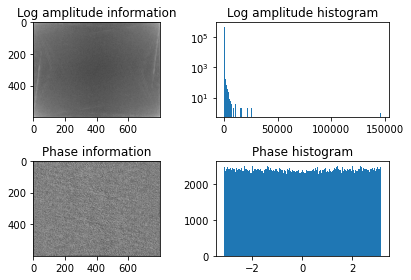

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2

img = plt.imread('images/dolly.png')

# YOUR CODE HERE
img_ft = fft2(img)

amplitude = np.abs(img_ft)
phase = np.angle(img_ft)

plt.gray()

f, ax = plt.subplots(2,2)
ax[0,0].set_title("Log amplitude information")
ax[0,0].imshow(np.log(amplitude))                     # log of the amplitude to enhance contrast.
ax[0,1].set_title("Log amplitude histogram")
ax[0,1].hist(amplitude.flatten(), bins=200, log=True)

ax[1,0].set_title("Phase information")
ax[1,0].imshow(phase)
ax[1,1].set_title("Phase histogram")
ax[1,1].hist(phase.flatten(), bins=200)

f.tight_layout()
plt.show()

**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see function `numpy.fft.fftshift`). Compare your results with CV-09, slide 33.

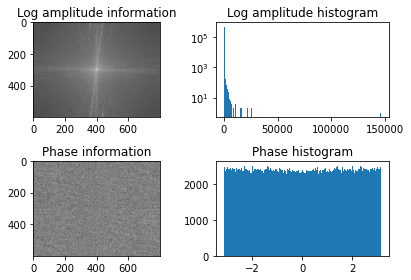

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftshift

img = plt.imread('images/dolly.png')

# YOUR CODE HERE
img_ft_shift = fftshift(img_ft)

amplitude = np.abs(img_ft_shift)
phase = np.angle(img_ft_shift)

f, ax = plt.subplots(2,2)
ax[0,0].set_title("Log amplitude information")
ax[0,0].imshow(np.log(amplitude))                     # log of the amplitude to enhance contrast.
ax[0,1].set_title("Log amplitude histogram")
ax[0,1].hist(amplitude.flatten(), bins=200, log=True)

ax[1,0].set_title("Phase information")
ax[1,0].imshow(phase)
ax[1,1].set_title("Phase histogram")
ax[1,1].hist(phase.flatten(), bins=200)

f.tight_layout()
plt.show()

**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

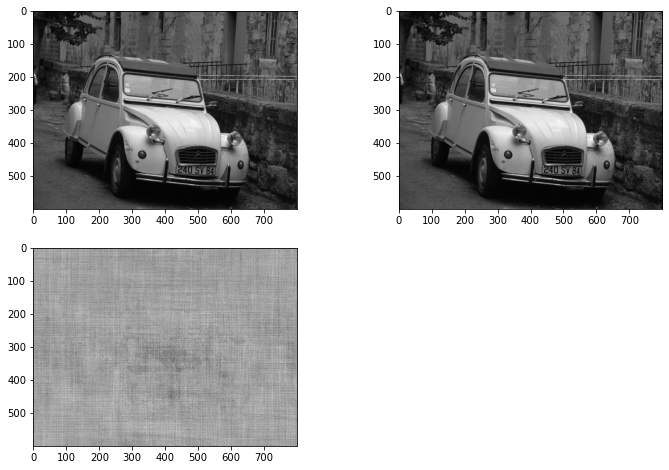

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img0 = plt.imread('images/dolly.png')

fft=np.fft.fft2(img0)
#fft=np.fft.fftshift(fft)

img1=np.fft.ifft2(fft, s=None, axes=(-2, -1), norm=None).real

plt.figure(figsize=(12, 8)) 
plt.gray()
plt.subplot(2,2,1)
plt.imshow(img0)
plt.subplot(2,2,2)
plt.imshow(img1)
plt.subplot(2,2,3)
plt.imshow(img0-img1)

Actually one can´t find failurs by bare eye... The result is actually pretty convinient with some respect to normal loss due to discrete computation, rounding etc.

**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

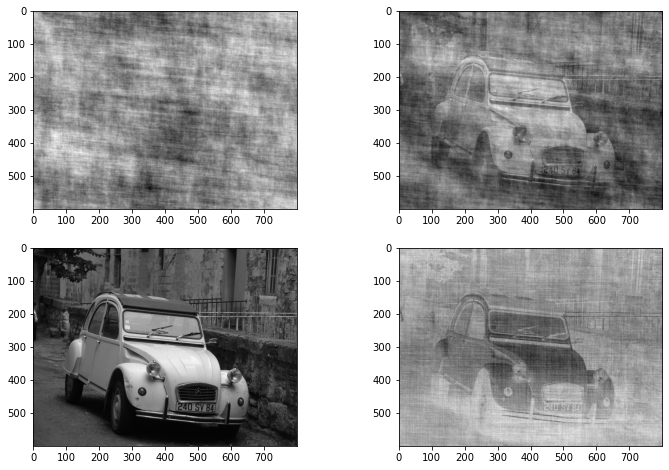

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img0 = plt.imread('images/dolly.png')

img_ft=np.fft.fft2(img0)

phase=np.angle(img_ft)
amplitude = np.abs(img_ft)


phase_random = np.random.uniform(phase.min(), phase.max(), phase.shape)

fft_phaseshift0=np.fft.ifft2(amplitude * np.exp(1j * phase_random))

img0=np.imag(fft_phaseshift0)


phase_disturbed = phase + np.random.normal(size=phase.shape)

fft_phaseshift1=np.fft.ifft2(amplitude * np.exp(1j * phase_disturbed))

img1=np.real(fft_phaseshift1)


phase_shift = phase + np.ones(phase_disturbed.shape)*(np.pi/0.25)

fft_phaseshift2=np.fft.ifft2(amplitude * np.exp(1j * phase_shift))

img2=np.real(fft_phaseshift2)


phase_shift = phase + np.ones(phase_disturbed.shape)*(np.pi/0.25)

fft_phaseshift2=np.fft.ifft2(amplitude * np.exp(1j * phase_shift))

img3=np.imag(fft_phaseshift2)


plt.figure(figsize=(12, 8))
plt.gray()
plt.subplot(2,2,1)
plt.imshow(img0)
plt.subplot(2,2,2)
plt.imshow(img1)
plt.subplot(2,2,3)
plt.imshow(img2)
plt.subplot(2,2,4)
plt.imshow(img3)

**e)** We do the same, but now we keep the phase while varying the amplitude values, i.e. constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.

Explain the results!


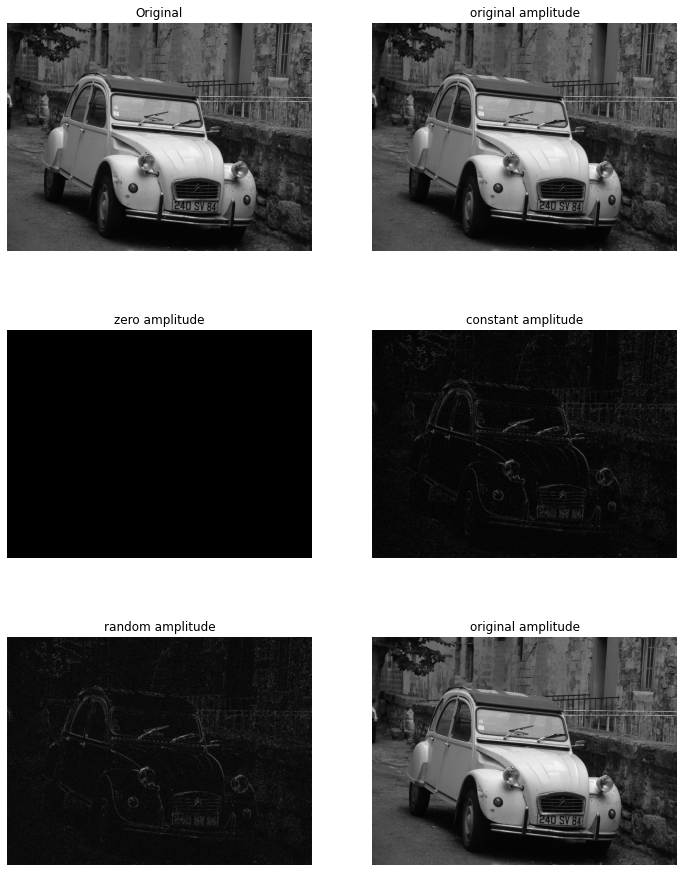

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

amplitudes = []
amplitudes.append((amplitude, "original amplitude"))
amplitudes.append((np.zeros(amplitude.shape), "zero amplitude"))
amplitudes.append((np.ones(amplitude.shape)*amplitude.max(), "constant amplitude"))
amplitudes.append((np.random.rand(*amplitude.shape), "random amplitude"))
amplitudes.append((amplitude, "original amplitude"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (amp, tit) in enumerate(amplitudes):
    ft0 = amp * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()

Zero amplitudes: If the amplitude is always zero nothing can be displayed -> Multiplication by zero equals to zero.
Constant amplitude: In edges all frequencies are contained. So the edges are looking brighter after fourier transform than the other parts of the picture if we are only looking on the phase. 
Random amplitude: Same explanation should hold for random, but the amplitude may not be reinforced in the same manner.

## Exercise 2: Implementing Fourier Transform [6 points]

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

Generally, the Fourier transform decomposes a function into a sum of sine and cosine functions. In CV it is used as a operation to decompose an arbitrary greyscale image into periodic waves of different frequencies and directions.

The frequency space is the depiction of the original image as periodic waves.

Each point in that space represents a frequency and its intensity (amplitude and phase).

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

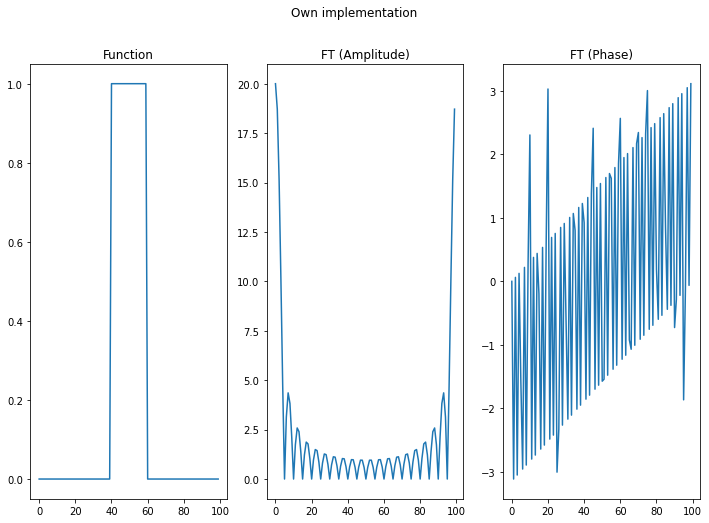

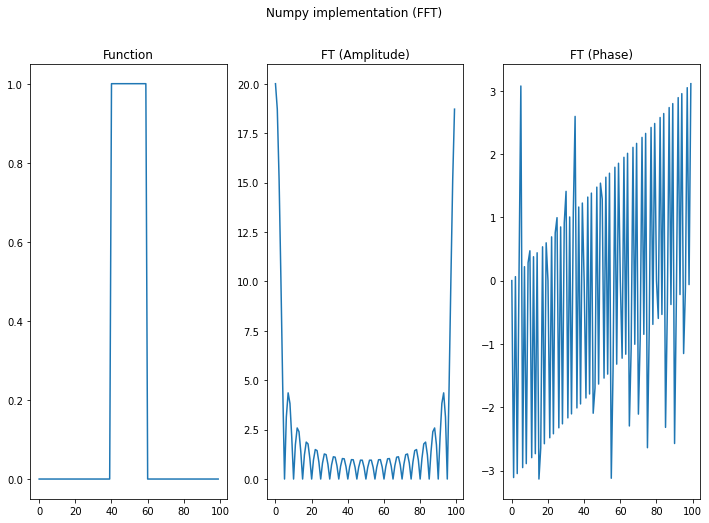

In [14]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    Args:
        func (ndarray): 1-D array containing the function values.
    
    Returns:
        ndarray (complex): The Fourier transformed function.
    """
    ft = np.zeros(func.shape, dtype=np.complex)

    # YOUR CODE HERE
    L = len(func)
    xs = np.arange(0, L)
    ns = np.arange(0, L)
    ft = np.array([np.sum(func[xs] * np.exp(2 * np.pi * -1j * n * xs / L)) for n in ns])
    return ft

# number of points
L = np.arange(100)

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

#func = np.sin(2 * np.pi * L / len(L))
func = np.zeros(L.shape)
func[40:60] = 1
#func = gaussian(L, 0, 10)

# Own implementation.
ft = fourier1d(func)
plt.figure(figsize=(12, 8))
plt.suptitle('Own implementation');
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

# Numpy implementation.
ft = np.fft.fft(func)

plt.figure(figsize=(12, 8))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`.

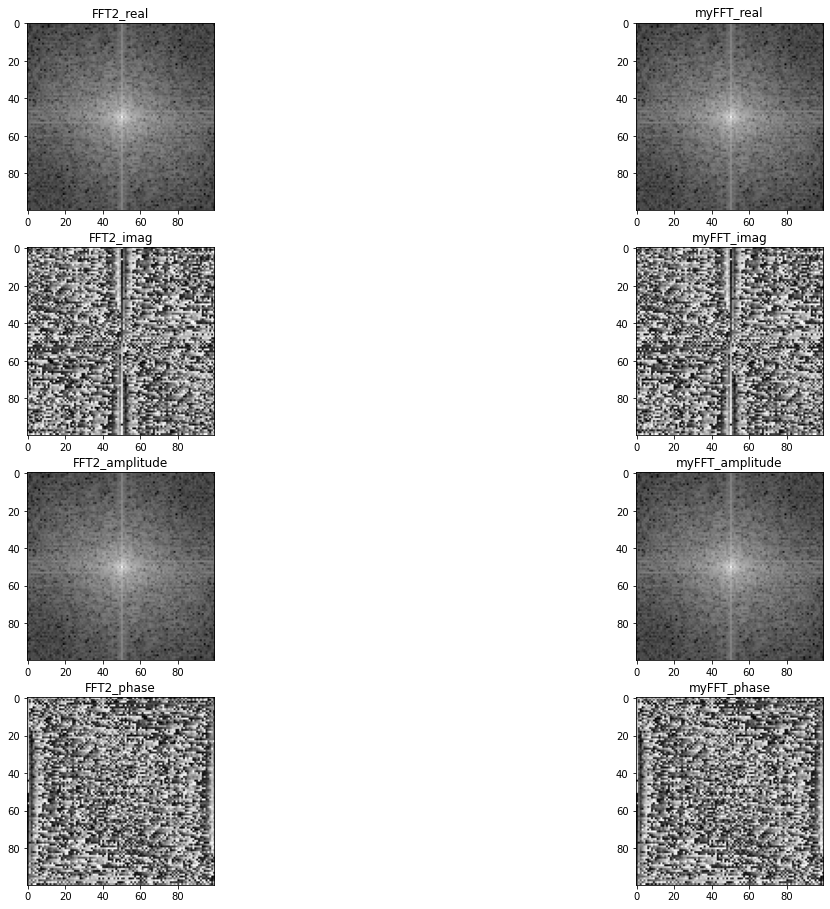

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def fourier2d(img):
    """
    Perform discrete 2D Fourier transform of a given image.
    """

    ft = np.zeros(img.shape, dtype=np.complex)
    rows = img.shape[0]
    columns = img.shape[1]

    for u in range(0, rows):
        for v in range(0, columns):
            x, y = np.meshgrid(np.arange(rows), np.arange(columns))
            ft[u,v] = np.sum(img[x, y] * np.exp(-1j * 2 * np.pi * ((u*x)/rows+(v*y)/columns)))
    return ft

img = plt.imread('images/dolly.png')

reduction=100
img_ft = np.fft.fft2(img[:reduction,:reduction])
img_ft_shift = np.fft.fftshift(img_ft)

amplitude = np.abs(img_ft_shift)
phase = np.angle(img_ft)

my_img_ft = fourier2d(img[:reduction,:reduction])
my_img_ft_shift = np.fft.fftshift(my_img_ft)

my_amplitude = np.abs(my_img_ft_shift)
my_phase = np.angle(my_img_ft)

plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.title('Original_Picture')
plt.imshow(img)

plt.subplot(5,2,3)
plt.title('FFT2_real')
plt.imshow(np.real(np.log(np.fft.fftshift(img_ft))))

plt.subplot(5,2,4)
plt.title('myFFT_real')
plt.imshow(np.real(np.log(np.fft.fftshift(my_img_ft))))

plt.subplot(5,2,5)
plt.title('FFT2_imag')
plt.imshow(np.imag(np.log(np.fft.fftshift(img_ft))))

plt.subplot(5,2,6)
plt.title('myFFT_imag')
plt.imshow(np.imag(np.log(np.fft.fftshift(my_img_ft))))

plt.subplot(5,2,7)
plt.title('FFT2_amplitude')
plt.imshow(np.log(amplitude))

plt.subplot(5,2,8)
plt.title('myFFT_amplitude')
plt.imshow(np.log(my_amplitude))

plt.subplot(5,2,9)
plt.title('FFT2_phase')
plt.imshow(phase)

plt.subplot(5,2,10)
plt.title('myFFT_phase')
plt.imshow(my_phase)

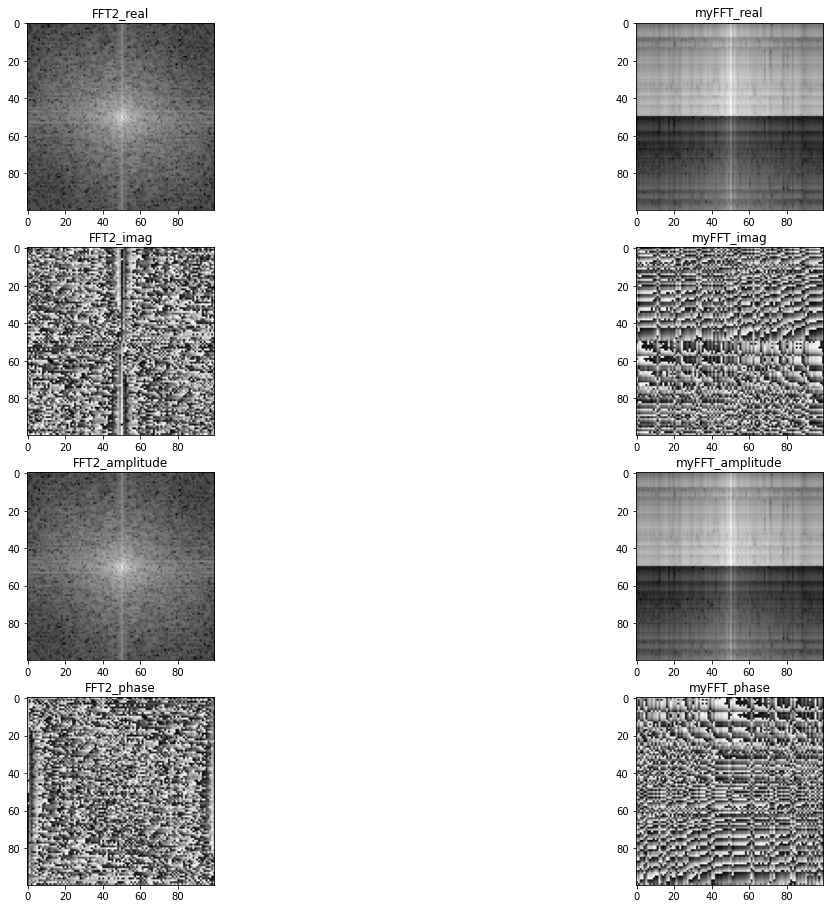

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def fourier2d(img):
    """
    Perform discrete 2D Fourier transform of a given image.
    """
    rows_len,columns_len = np.shape(img)
    
    ft = np.zeros(img.shape, dtype=np.complex)
    
    for  rows in range(0,rows_len):
        for columns in range(0,columns_len):
            sum=0
            for x in range(0, columns_len):
                sum += img[rows][x] * np.exp(2*-1j*np.pi*columns*x/columns_len)
                #print(sum)
            ft[rows][columns]=sum
            
    for  columns in range(0,columns_len):
        for rows in range(0,rows_len):
            sum=0
            for y in range(0, rows_len):
                sum += ft[y][columns] * np.exp(2*-1j*np.pi*rows*y/rows_len)
                #print(sum)
            ft[rows][columns]=sum
            
    return ft


img = plt.imread('images/dolly.png')

reduction=100
img_ft = np.fft.fft2(img[:reduction,:reduction])
img_ft_shift = np.fft.fftshift(img_ft)

amplitude = np.abs(img_ft_shift)
phase = np.angle(img_ft)

my_img_ft = fourier2d(img[:reduction,:reduction])
my_img_ft_shift = np.fft.fftshift(my_img_ft)

my_amplitude = np.abs(my_img_ft_shift)
my_phase = np.angle(my_img_ft)

plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.title('Original_Picture')
plt.imshow(img)

plt.subplot(5,2,3)
plt.title('FFT2_real')
plt.imshow(np.real(np.log(np.fft.fftshift(img_ft))))

plt.subplot(5,2,4)
plt.title('myFFT_real')
plt.imshow(np.real(np.log(np.fft.fftshift(my_img_ft))))

plt.subplot(5,2,5)
plt.title('FFT2_imag')
plt.imshow(np.imag(np.log(np.fft.fftshift(img_ft))))

plt.subplot(5,2,6)
plt.title('myFFT_imag')
plt.imshow(np.imag(np.log(np.fft.fftshift(my_img_ft))))

plt.subplot(5,2,7)
plt.title('FFT2_amplitude')
plt.imshow(np.log(amplitude))

plt.subplot(5,2,8)
plt.title('myFFT_amplitude')
plt.imshow(np.log(my_amplitude))

plt.subplot(5,2,9)
plt.title('FFT2_phase')
plt.imshow(phase)

plt.subplot(5,2,10)
plt.title('myFFT_phase')
plt.imshow(my_phase)

## Exercise 3: Convolution theorem [7 points]

**a)** What does the convolution theorem state and what are its practical consequences?

A convolution in space is just a pointwise multiplication in Fourier space. This means that a convolution can be very fast computed in Fourier space. So for large convolution kernels, the computation in Fourier space may save much runtime.

**b)**
When introducing convolution, we have discussed different methods to deal with boundary pixels. From the perspective of Fourier analysis, what is the natural way to deal with this problem?

From the perspective of Fourier analysis, the natural way is to use no padding, because there are no boundary pixels added to apply any kind of padding in the boundary areas of the original image. So the boundary areas of the image are clipped.

**c)** What is the complexity for computing a convolution using the convolution theorem? Compare this with your complexity results from sheet 01, Assignment 1(c).


YOUR ANSWER HERE

**d)** Proof the convolution theorem.

YOUR ANSWER HERE

## Exercise 4: Applying Fourier Transform [Bonus]

If you solve this exercise you may leave out one of the other exercises.


**a)** In order to apply the Custom Structuring Element to our satelite image in Assignment 4 of Sheet 3 we had to rotate the image. We had to measure the rotation angle by hand. We can now do this automatically via Fourier Transform.

1. Apply Fourier transform to the `img_gray`. The resulting amplitude should show the angle of the black lines.

1. Try to automatically get the rotation angle from the Fourier space. There are different ways to achieve this.
   Hints:
   * You may threshold the amplitudes, to only keep “relevant” values. You can then compute the angle of the largest relevant value.
   * Alternatively, you may apply methods you know from other lectures to get the main component and compute its angle.

1. Rotate the image back to its originally intended orientation (`skimage.transform.rotate`).

In [ ]:
%matplotlib inline
import numpy as np
from skimage import color
from skimage.transform import hough_line
from skimage.transform import rotate
import matplotlib.pyplot as plt

img = plt.imread('images/landsat_stack2.png')
img_gray = color.rgb2gray(img)

# YOUR CODE HERE

plt.show()

**b)** Can you think of other applications of Fourier Transform in Computer Vision?

YOUR ANSWER HERE